<a href="https://colab.research.google.com/github/faizAfham/PlaneCrashEDA/blob/main/Copy_of_PlaneCrashesEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Flight Crashes since 1908

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

so now we will import our data
and try to understand whats going on

In [2]:
from google.colab import files

uploaded = files.upload()  # Opens a file upload dialog


Saving Airplane_Crashes_and_Fatalities_Since_1908.csv to Airplane_Crashes_and_Fatalities_Since_1908.csv


In [4]:
df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")

In [5]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [6]:
df.shape

(5268, 13)

In [7]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [8]:
df.dtypes

,0
Date,object
Time,object
Location,object
Operator,object
Flight #,object
Route,object
Type,object
Registration,object
cn/In,object
Aboard,float64


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.query('Time.isnull()')


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
7,1916-07-28,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
10,1916-11-21,NaN,"Mainz, Germany",Military - German Army,NaN,NaN,Super Zeppelin (airship),NaN,NaN,28.0,27.0,0.0,Crashed in a storm.
12,1917-03-04,NaN,"Near Gent, Belgium",Military - German Army,NaN,NaN,Airship,NaN,NaN,20.0,20.0,0.0,Caught fire and crashed.
13,1917-03-30,NaN,Off Northern Germany,Military - German Navy,NaN,NaN,Schutte-Lanz S-L-9 (airship),NaN,NaN,23.0,23.0,0.0,Struck by lightning and crashed into the Balti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,2007-08-22,NaN,"Near Kirkuk, Iraq",Military - U.S. Army,NaN,Transporting troops,UH-60 Blackhawk helilcopter,NaN,NaN,14.0,14.0,0.0,Crashed most likely due to a mechanical proble...
5172,2007-09-24,NaN,"Malemba Nkulu, DR Congo",Karibu Airways,NaN,Lubumbashi - Malemba Nkulu,Let 410,9Q-CVL,NaN,6.0,1.0,0.0,Crashed while attempting to land and came to r...
5211,2008-06-20,NaN,"Bannang Sata, Thailand",Military - Thai Army,NaN,NaN,Bell UH-1N,NaN,NaN,10.0,10.0,0.0,The military helicopter developed a mechanical...
5264,2009-05-26,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...


In [11]:
df.describe()

,Date,Aboard,Fatalities,Ground
count,5268,5246.000000,5256.000000,5246.000000
mean,1971-10-23 15:50:42.369020480,27.554518,20.068303,1.608845
min,1908-09-17 00:00:00,0.000000,0.000000,0.000000
25%,1954-04-11 18:00:00,5.000000,3.000000,0.000000
50%,1973-03-04 00:00:00,13.000000,9.000000,0.000000
75%,1990-06-26 18:00:00,30.000000,23.000000,0.000000
max,2009-06-08 00:00:00,644.000000,583.000000,2750.000000
std,NaN,43.076711,33.199952,53.987827


In [12]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [13]:
df = df[['Date',
    #'Time',
    'Location', 'Operator',
    #'Flight #', 'Route', 'Type',
       #'Registration', 'cn/In', 'Aboard',
    'Fatalities', 'Ground',
    #'Summary'
    ]].copy()

i think some nlp or vectorisation can be done to this dataset, the summary part and other things will be useful

In [14]:
df.shape


(5268, 5)

In [15]:
df.dtypes

,0
Date,datetime64[ns]
Location,object
Operator,object
Fatalities,float64
Ground,float64


In [16]:
df.isna().sum()

,0
Date,0
Location,20
Operator,18
Fatalities,12
Ground,22


In [17]:
df.loc[df.duplicated()]

,Date,Location,Operator,Fatalities,Ground


In [18]:
df.dtypes

,0
Date,datetime64[ns]
Location,object
Operator,object
Fatalities,float64
Ground,float64


In [19]:
df['Date'].value_counts()

,count
Date,
2001-09-11,4
1988-08-31,4
1992-08-27,4
1973-02-28,4
1972-06-18,4
...,...
1962-01-22,1
1961-12-24,1
1961-12-21,1


In [20]:
df['Year'] = df['Date'].dt.year


In [21]:
df['Month'] = df['Date'].dt.month

In [22]:
df.head()

,Date,Location,Operator,Fatalities,Ground,Year,Month
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,1.0,0.0,1908,9
1,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,5.0,0.0,1912,7
2,1913-08-06,"Victoria, British Columbia, Canada",Private,1.0,0.0,1913,8
3,1913-09-09,Over the North Sea,Military - German Navy,14.0,0.0,1913,9
4,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,30.0,0.0,1913,10


<Axes: xlabel='Year'>

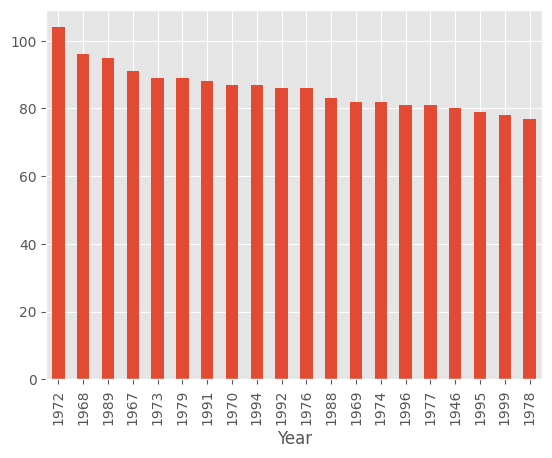

In [23]:
df['Year'].value_counts().head(20).plot(kind='bar')


<Axes: xlabel='Month'>

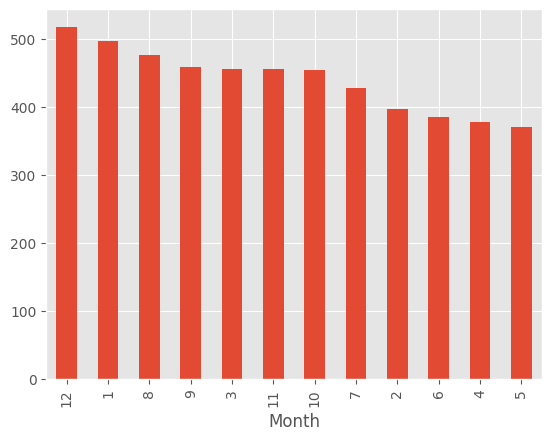

In [24]:
df['Month'].value_counts().head(12).plot(kind='bar')

In [25]:
df

,Date,Location,Operator,Fatalities,Ground,Year,Month
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,1.0,0.0,1908,9
1,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,5.0,0.0,1912,7
2,1913-08-06,"Victoria, British Columbia, Canada",Private,1.0,0.0,1913,8
3,1913-09-09,Over the North Sea,Military - German Navy,14.0,0.0,1913,9
4,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,30.0,0.0,1913,10
...,...,...,...,...,...,...,...
5263,2009-05-20,"Near Madiun, Indonesia",Military - Indonesian Air Force,98.0,2.0,2009,5
5264,2009-05-26,"Near Isiro, DemocratiRepubliCongo",Service Air,4.0,NaN,2009,5
5265,2009-06-01,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,228.0,0.0,2009,6
5266,2009-06-07,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,1.0,0.0,2009,6


<Axes: xlabel='Location'>

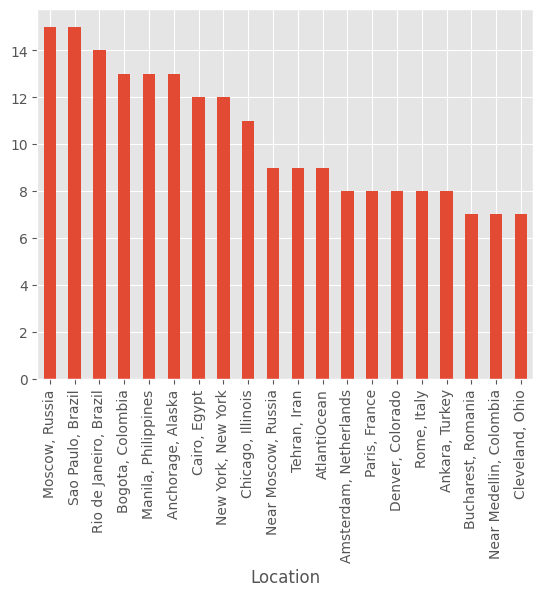

In [26]:
df["Location"].value_counts().head(20).plot(kind='bar')

Text(0, 0.5, 'Frequency')

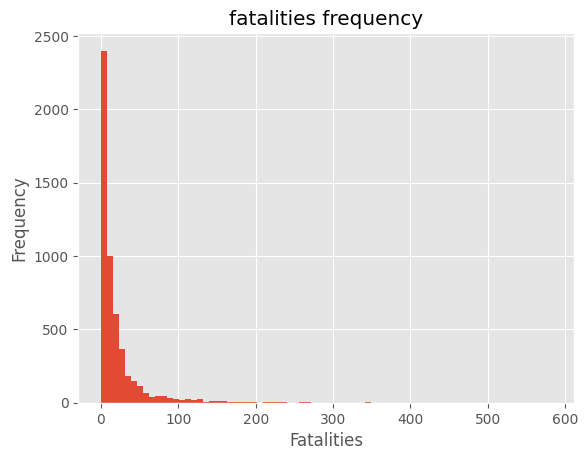

In [27]:
ax = df['Fatalities'].plot(kind='hist',
                           bins=75,
                           title= 'fatalities frequency')
ax.set_xlabel('Fatalities')
ax.set_ylabel('Frequency')


Text(0.5, 0, 'Fatalities')

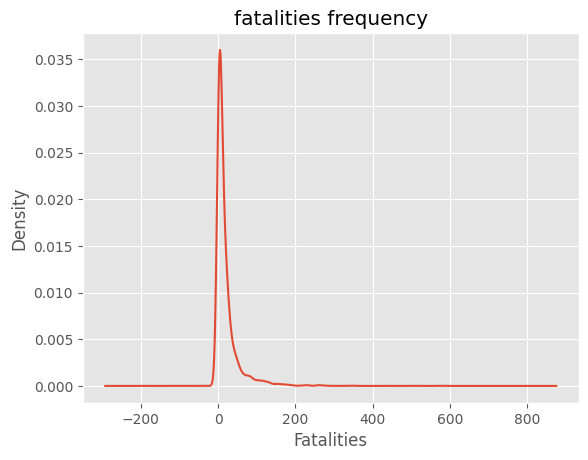

In [28]:
ax = df['Fatalities'].plot(kind='kde',
                           title= 'fatalities frequency')
ax.set_xlabel('Fatalities')

<Axes: xlabel='Year', ylabel='Fatalities'>

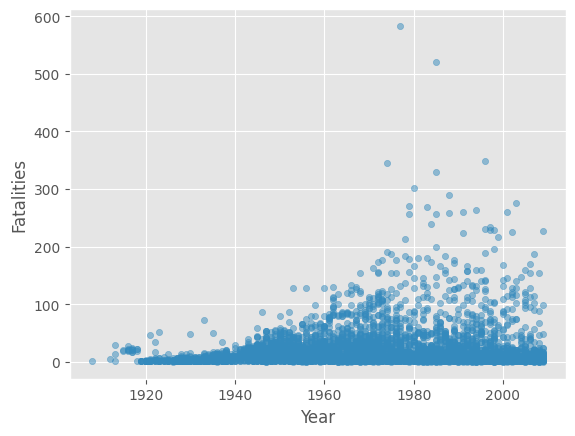

In [29]:
df.plot(kind='scatter', x='Year', y='Fatalities', alpha=0.5)

<Axes: xlabel='Year', ylabel='Fatalities'>

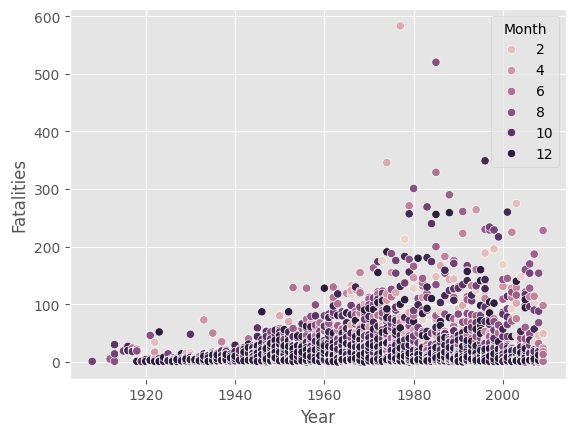

In [30]:
sns.scatterplot(data=df, x='Year', y='Fatalities', hue='Month')

In [31]:
df


,Date,Location,Operator,Fatalities,Ground,Year,Month
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,1.0,0.0,1908,9
1,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,5.0,0.0,1912,7
2,1913-08-06,"Victoria, British Columbia, Canada",Private,1.0,0.0,1913,8
3,1913-09-09,Over the North Sea,Military - German Navy,14.0,0.0,1913,9
4,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,30.0,0.0,1913,10
...,...,...,...,...,...,...,...
5263,2009-05-20,"Near Madiun, Indonesia",Military - Indonesian Air Force,98.0,2.0,2009,5
5264,2009-05-26,"Near Isiro, DemocratiRepubliCongo",Service Air,4.0,NaN,2009,5
5265,2009-06-01,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,228.0,0.0,2009,6
5266,2009-06-07,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,1.0,0.0,2009,6


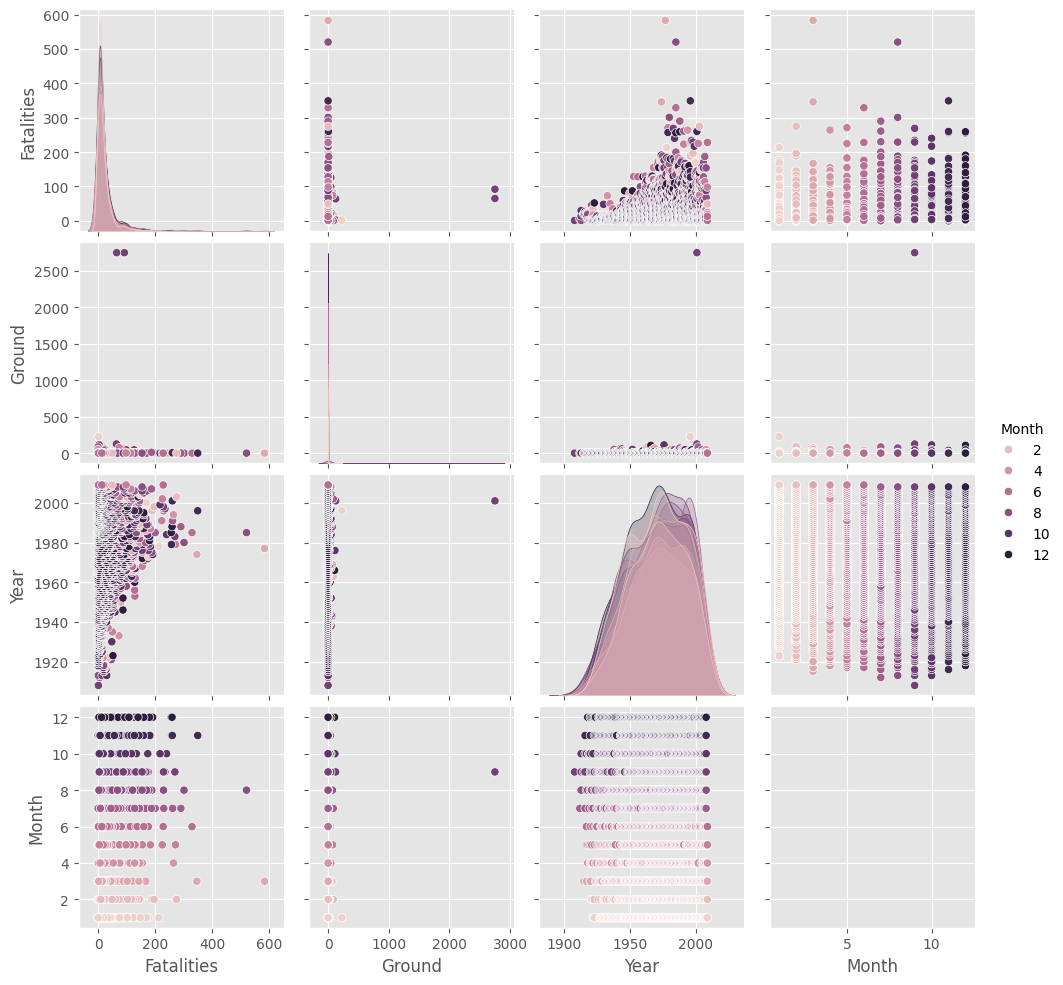

In [32]:
sns.pairplot(df, vars= ['Fatalities', 'Ground', 'Year', 'Month'],
             hue='Month')

In [41]:
df_corr = df[['Fatalities', 'Ground', 'Year', 'Month']].dropna().corr()

<Axes: >

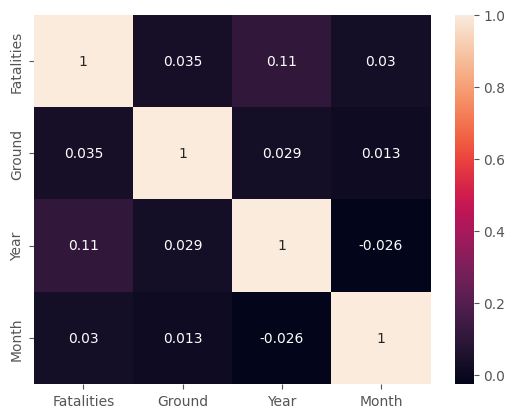

In [56]:
sns.heatmap(df_corr, annot=True)

In [44]:
Max_fatalities_by_year = df.groupby('Year')['Fatalities'].max().reset_index()
Max_fatalities_by_year

,Year,Fatalities
0,1908,1.0
1,1912,5.0
2,1913,30.0
3,1915,21.0
4,1916,27.0
...,...,...
93,2005,160.0
94,2006,170.0
95,2007,187.0
96,2008,154.0


<Axes: xlabel='Year', ylabel='Fatalities'>

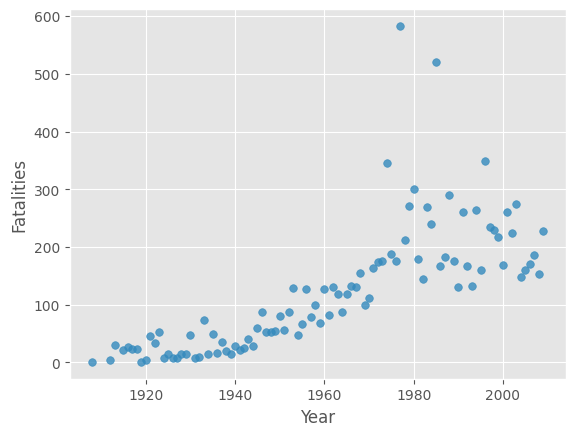

In [54]:

Max_fatalities_by_year.plot(kind='scatter', x='Year', y='Fatalities', s=30, alpha=.8)
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [58]:
max_fatalities_by_year_corr = max_fatalities_by_year[['Fatalities', 'Year']].dropna().corr()
max_fatalities_by_year_corr

,Fatalities,Year
Fatalities,1.000000,0.753935
Year,0.753935,1.000000


<Axes: >

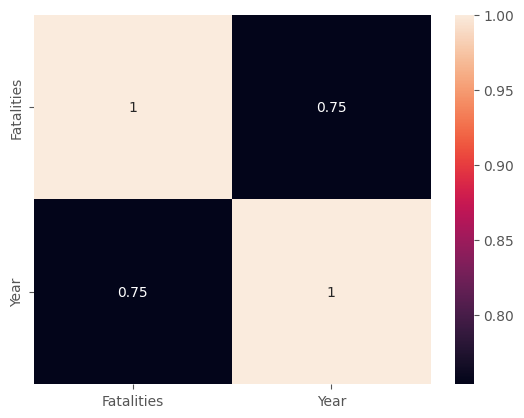

In [57]:
sns.heatmap(max_fatalities_by_year_corr, annot=True)

In [60]:
# Calculate total deaths per year
total_deaths_year = df.groupby('Year')['Fatalities'].sum().reset_index()
total_deaths_year.rename(columns={'Fatalities': 'Total_Deaths_Year'}, inplace=True)

# Merge with Max_fatalities_by_year DataFrame
Max_fatalities_by_year = Max_fatalities_by_year.merge(total_deaths_year, on='Year', how='left')

Max_fatalities_by_year

,Year,Fatalities,Total_Deaths_Year_x,Total_Deaths_Year_y
0,1908,1.0,1.0,1.0
1,1912,5.0,5.0,5.0
2,1913,30.0,45.0,45.0
3,1915,21.0,40.0,40.0
4,1916,27.0,108.0,108.0
...,...,...,...,...
93,2005,160.0,1306.0,1306.0
94,2006,170.0,1136.0,1136.0
95,2007,187.0,931.0,931.0
96,2008,154.0,820.0,820.0


In [64]:
Max_fatalities_by_year = Max_fatalities_by_year.drop('Total_Deaths_Year_y', axis=1)

In [67]:
Max_fatalities_by_year = Max_fatalities_by_year.rename(columns={'Total_Deaths_Year_x': 'Total_Death', 'Fatalities': 'Max_Fatalities'})

In [68]:
Max_fatalities_by_year

,Year,Max_Fatalities,Total_Death
0,1908,1.0,1.0
1,1912,5.0,5.0
2,1913,30.0,45.0
3,1915,21.0,40.0
4,1916,27.0,108.0
...,...,...,...
93,2005,160.0,1306.0
94,2006,170.0,1136.0
95,2007,187.0,931.0
96,2008,154.0,820.0


In [70]:
Max_fatalities_by_year_corr = Max_fatalities_by_year[['Max_Fatalities', 'Year', 'Total_Death']].dropna().corr()

<Axes: >

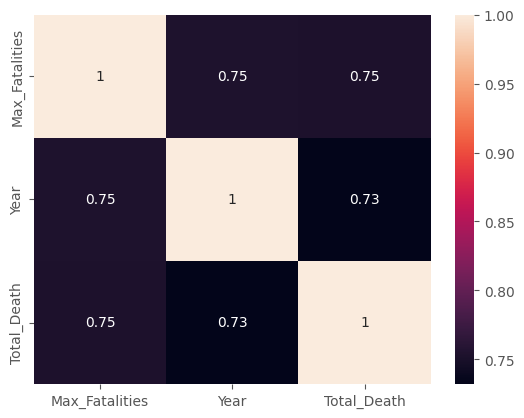

In [71]:
sns.heatmap(Max_fatalities_by_year_corr, annot=True)

In [72]:
%who_ls DataFrame

['Max_fatalities_by_year',
 'Max_fatalities_by_year_corr',
 'df',
 'df_corr',
 'df_sorted',
 'max_fatalities_by_year',
 'max_fatalities_by_year_corr',
 'total_deaths_year']